<a href="https://colab.research.google.com/github/jhdavislab/wqbio2022/blob/main/wqbio2022_cryoem_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Visualizing cryo-EM movies and micrographs
*Material developed by Prof. Joey Davis (jhdavis@mit.edu), and graduate students Barrett Powell (bmp@mit.edu) and Laurel Kinman (lkinman@mit.edu). More information available at: https://github.com/jhdavislab/wqbio2022*

## Importing our required libraries

In [1]:
!pip install mrcfile #this line will install a library we use to read mrc files, which is the standard format for all cryoEM data.

     |████████████████████████████████| 40 kB 10 kB/s 


In [2]:
import mrcfile as mrcf
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Defining a few plotting parameters

In [4]:
#####################################################
figsize = (8,8) #set this appropriately based on your screen size - 8,8 works well on a laptop

ang_px = 0.6575 #this was the pixel size used in the microscope...crazy, right?
proteasome_length_ang = 150 #this is approxiamately the length of the proteasome in angstroms
proteasome_length_px = proteasome_length_ang/ang_px #this is the length in pixels
######################################################

## Defining a few useful functions to plot our images
* Time permitting, you can read through this function, but it is not critical for this module.
 * *If you do take the time, think about why we set the vmin and vmax the way we do - hint: try plotting a histogram of the pixel values in one of our images to think about why we need to narrow the range to see our images*

In [5]:
def plot_micrograph(img, figsize=figsize, axis=False, crange=2, ax=None):
    if ax is None:
      f, ax = plt.subplots(1,1, figsize=figsize) #this creates a figure for us
    img_mean = img.mean() #electron micrographs often have outlier pixels, so we calculate the mean/std, and typically set the display range to mean+/-2*std
    img_std = img.std()
    ax.imshow(img, cmap='gray', origin='lower', vmin=img_mean-crange*img_std, vmax=img_mean+crange*img_std) #here we set the crange parameter to display mean+/-2*std - this thresholds the outlier pixels
    if not axis:
        ax.axis('off')
    return ax

In [6]:
def plot_movie(movie, figsize=(10,21), axis=False, crange=2, num_cols=2):
  num_frames = movie.shape[0]
  num_rows = math.ceil(num_frames/num_cols)
  f,axes = plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for frame in range(num_frames):
    plot_micrograph(movie[frame,:,:], axis=axis, crange=crange, ax=axes[frame])
  if not axis:
    for a in axes:
      a.axis('off')

  plt.tight_layout()

## Ploting a movie

* Here, we will load a single movie file - note that I have cropped the image from ~7000x7000 to 1000x1000, focusing in on a small region of the image. This was done simply to make the file more managable (the original movie is ~8Gbi, and a typical experiment will collect ~1000 movies!!!!)

In [7]:
# Be sure that you have "saved a copy" of the qmw_cryoem_data into My Drive, and not a sub-directory
movie1 = mrcf.open('/content/drive/My Drive/qmw_cryoem_data/t20s_movie_crop.mrc').data
movie1.shape

(38, 1000, 1000)

* Take a moment to think about the shape of this numpy array - **what does each axis refer to?**

Let's now plot the first 8 movie frames using the function we defined above. Note how I am selecting the frames of interest.

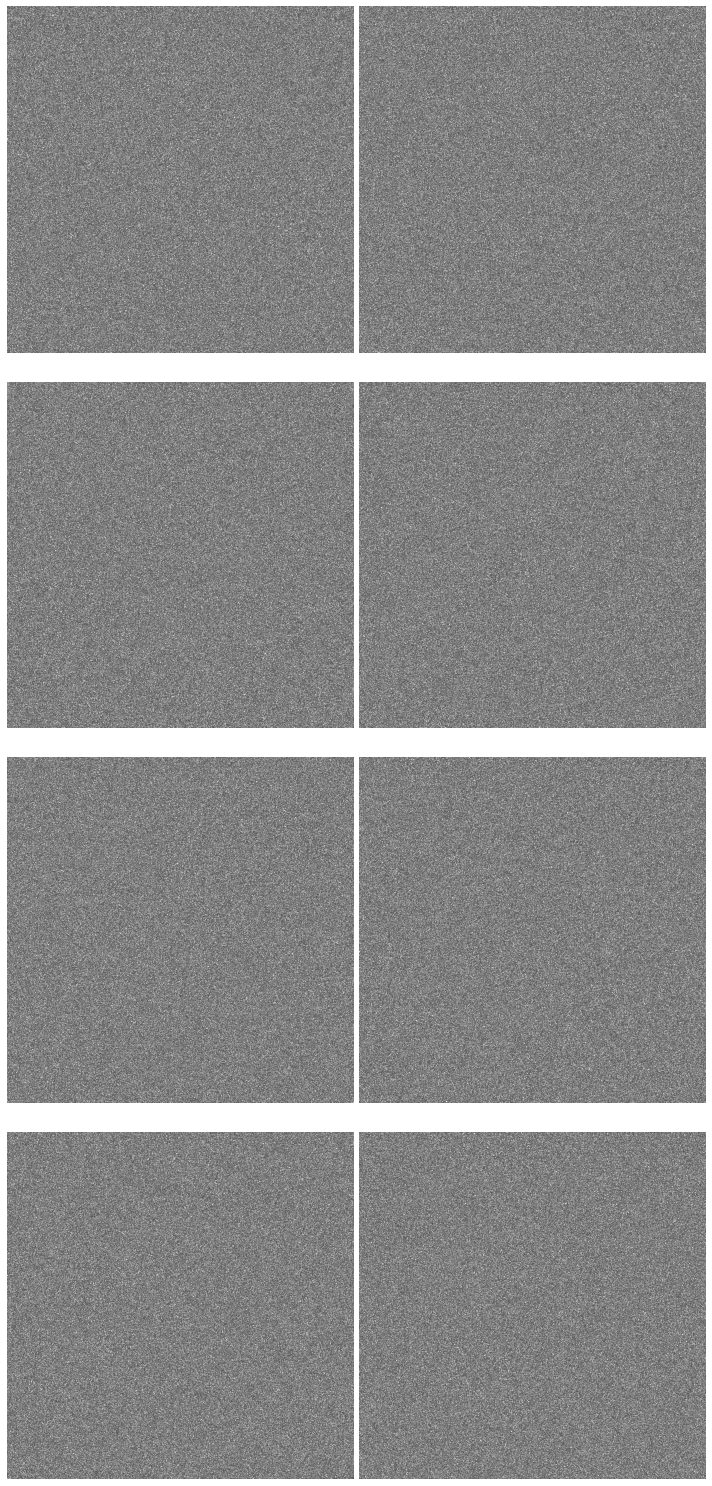

In [8]:
plot_movie(movie1[0:8,:,:])

* Yikes - I don't see any proteasome, do you?
* Let's try looking at the last 8 frames. **Fill in the code below to plot the final 8 frames**

In [9]:
#Fill me in


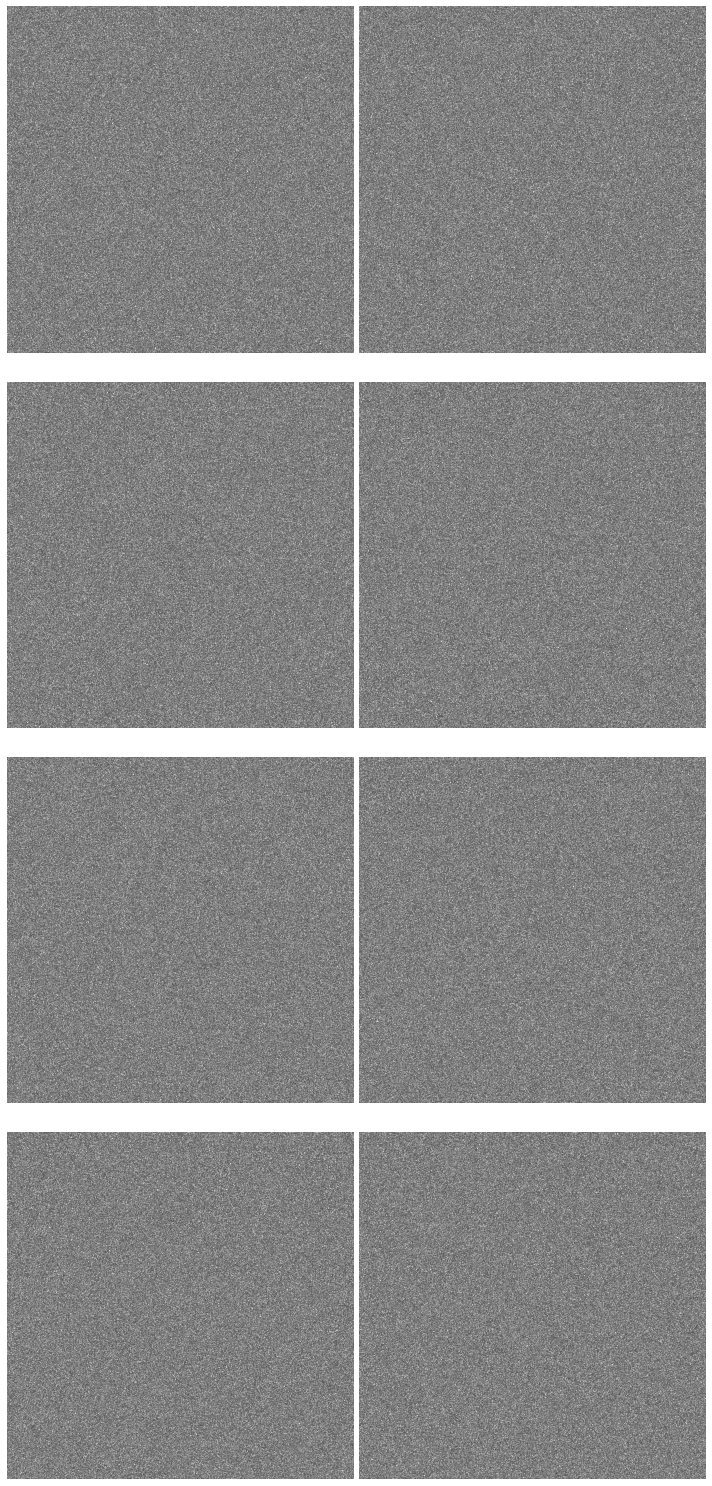

In [10]:
#@title Solution
plot_movie(movie1[-8:,:,:])

Hmm, still not very clear.

**What do you think will happen if we sum all of the movie frames - do we expect to increase the signal to noise ratio this way?**

## Inspecting a micrograph

In [11]:
summed_movie = np.sum(movie1, axis=0) #read this line of code carefully and think about what I am summing - discuss with your neighbor

Let's now plot the resulting "micrograph". Here, I've also added a scale bar corresponding to the length of the long axies of a proteasome. In a real experiment, we wouldn't necessarily know how large of an object to expect, but we might have a general idea. 

**What orthogonal biochemical or structural techniques might one use to get a general idea of what size of an object we expect to see?**

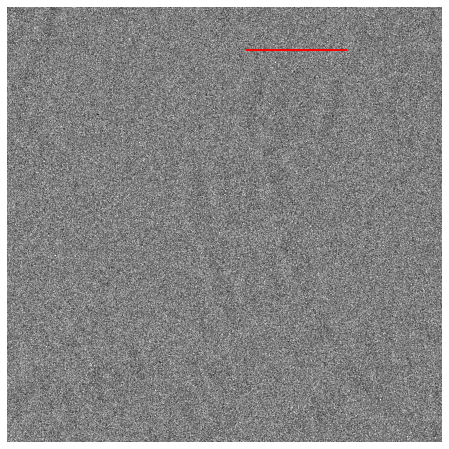

In [12]:
ax = plot_micrograph(summed_movie)
ax.plot([550,550+proteasome_length_px], [900,900], color='red', linewidth=2)

**Do you see any proteasomes?**
* It's still challenging, right? But remember, we're looking at a **single** molecule - like one teeny tiny molecule that is ~10,000 times smaller than the width of a human hair. No matter how many times I see images like this, I am still blown away that it's possible. 

Anyways, let's try and emphasize the low frequency features of the image, and down-weight the high frequency features. 

* This approeach is known as "low-pass filtering", and it will utilize a Fourier transform of our data.

**Proceed to [part2](https://colab.research.google.com/drive/1T3TM6mBGDRw-i1kZ9FjhqL3Z_g0mLxPF) of the workshop**